<a href="https://colab.research.google.com/github/SHUBH090795/Hotel-Booking-Analysis/blob/main/Shubham_Naktode_EDA_Hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Project Name : Hotel Booking Analysis**


This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the accommodation type. How many booking were cancelled and from which country most guests come.
Explore and analyze the data to discover important factors that govern the bookings.

Importing libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now import the dataset

In [51]:
data = pd.read_csv('/content/drive/MyDrive/capstone project eda/Hotel Bookings.csv')


Copy the dataset, so our original dataset remains unchanged

In [52]:
df = data.copy()

In [53]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [55]:
df.shape

(119390, 32)


# Cleaning data

**1.Remove duplicate rows**

In [56]:
df[df.duplicated()].shape

(31994, 32)

In [57]:
df.drop_duplicates(inplace = True)

In [58]:
df.shape

(87396, 32)

**2.Handling missing values.**

In [59]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

We have 4 missing values of company, agent, country and children.


In the agent and company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [60]:
df[['agent','company']] = df[['agent','company']].fillna(0)

Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

In [61]:
df['children'].fillna(round(data.children.mean()), inplace=True)

This column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [62]:
df['country'].fillna('others', inplace = True)

In [63]:
# Checking if all null values are removed
df.isnull().sum().sort_values(ascending = False)


hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [64]:
# Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

# Data manipulation
**Converting Datatype** 

Let’s check the datatype of each column in our dataset.

In [65]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

There are some columns like children, company, and agent, that are float type but their values are only in integers.

so we convert the type of data

In [66]:
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

# EDA

**1.What is the booking ratio between Resort Hotel and City Hotel?**

In [67]:
from pandas.core.groupby import groupby
g1 = df.groupby('hotel')

In [68]:
d1= pd.DataFrame((g1.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})

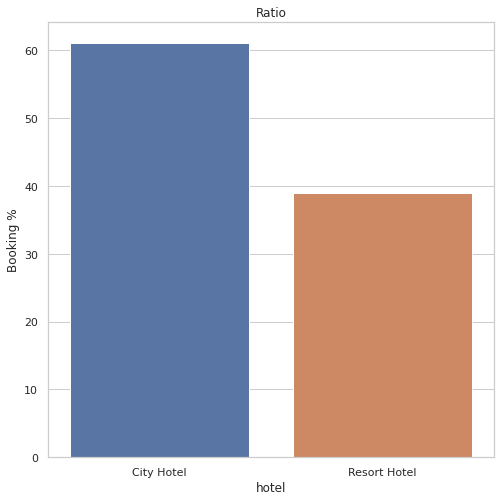

In [69]:
plt.figure()
sns.barplot(x = d1['hotel'], y = d1['Booking %'])
plt.title('Ratio')
plt.show()


More than 60% bookings are for City hotel and around 40% bookings are for Resort hotel.

**2.What is the percentage of booking for each year?**

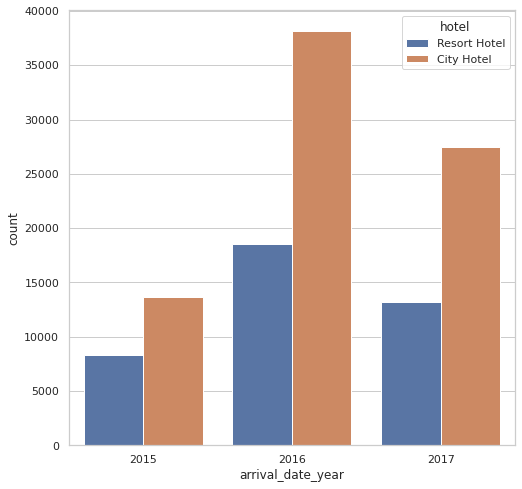

In [70]:
list_1 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = data[list_1]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel')

More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.